In [ ]:
age =int(input("Enter your age: "))
if age<50:
  print("Young")
elif age>50:
  print("Adult")
else:
  print("Senior")


Enter your age: 40
Young


In [ ]:
scores = int(input("Enter your scores: "))
if scores < 60:
  print("Low")
elif scores > 50:
  print("Medium")
elif scores > 40:
  print("High")
else:
  print("Excellent")

Enter your scores: 30
Low


In [ ]:
spending_scores = [65, 40, 58, 30, 55]

for score in spending_scores:
  if score > 60:
    print("High")
  elif score >= 40:
    print("Medium")
  else:
    print("Low")

High
Medium
Medium
Low
Medium


In [ ]:
visit_frequency = [12, 8, 10, 5, 9]

total_visits = 0
for frequency in visit_frequency:
  if frequency > 8:
    total_visits += frequency

print(f"Total visits (more than 8 times): {total_visits}")

Total visits (more than 8 times): 31


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd

df = pd.read_csv("/content/Exam Dataset - Sheet1.csv")

display(df.head())

,Customer id,Age,Annual income,Spending score,Visit frequency,Churned,Random code,Useless note
0,1,25.0,30000,65.0,12.0,No,XYZ123,remove
1,2,32.0,52000,40.0,8.0,Yes,ABC555,remove
2,3,28.0,45000,58.0,10.0,No,LMN999,remove
3,4,45.0,61000,30.0,5.0,Yes,PQR222,remove
4,5,35.0,58000,55.0,9.0,No,UVW777,remove


In [ ]:
# print(df.info())
# print("Described:\n ",df.describe())
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer id      12 non-null     int64  
 1   Age              12 non-null     float64
 2   Annual income    12 non-null     int64  
 3   Spending score   12 non-null     float64
 4   Visit frequency  12 non-null     float64
 5   Churned_Yes      12 non-null     bool   
dtypes: bool(1), float64(3), int64(2)
memory usage: 624.0 bytes


,Customer id,Age,Annual income,Spending score,Visit frequency
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,6.500000,33.818182,48833.333333,52.727273,8.909091
std,3.605551,7.030042,11707.288587,13.571969,2.778310
min,1.000000,25.000000,30000.000000,30.000000,5.000000
25%,3.750000,28.750000,42500.000000,43.750000,6.750000
50%,6.500000,32.909091,51000.000000,56.500000,8.954545
75%,9.250000,38.000000,58750.000000,62.750000,11.250000
max,12.000000,45.000000,62000.000000,70.000000,13.000000


In [ ]:
print(df.isnull().sum())

Customer id        0
Age                1
Annual income      0
Spending score     1
Visit frequency    1
Churned            0
Random code        0
Useless note       0
dtype: int64


In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
print(df.isnull().sum())

Customer id        0
Age                0
Annual income      0
Spending score     1
Visit frequency    1
Churned            0
Random code        0
Useless note       0
dtype: int64


In [ ]:

df['Spending score'] = df['Spending score'].fillna(df['Spending score'].mean())
df['Visit frequency'] = df['Visit frequency'].fillna(df['Visit frequency'].mean())
print("Missing values after imputation:")

Missing values after imputation:


In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
print("Categorical columns identified:")
print(categorical_cols)

Categorical columns identified:
Index(['Churned', 'Random code', 'Useless note'], dtype='object')


In [ ]:
df = pd.get_dummies(df, columns=['Churned'], drop_first=True)
print("DataFrame after one-hot encoding 'Churned' column:")
display(df.head())


DataFrame after one-hot encoding 'Churned' column:


,Customer id,Age,Annual income,Spending score,Visit frequency,Random code,Useless note,Churned_Yes
0,1,25.0,30000,65.0,12.0,XYZ123,remove,False
1,2,32.0,52000,40.0,8.0,ABC555,remove,True
2,3,28.0,45000,58.0,10.0,LMN999,remove,False
3,4,45.0,61000,30.0,5.0,PQR222,remove,True
4,5,35.0,58000,55.0,9.0,UVW777,remove,False


In [ ]:
print("Unique values and counts for 'Random code' column:")
print(df['Random code'].value_counts())
print("\nUnique values and counts for 'Useless note' column:")
print(df['Useless note'].value_counts())

Unique values and counts for 'Random code' column:
Random code
XYZ123    2
PQR222    2
ABC555    1
LMN999    1
UVW777    1
JKL000    1
TTT222    1
MMM111    1
GHJ888    1
QQQ333    1
Name: count, dtype: int64

Unique values and counts for 'Useless note' column:
Useless note
remove    12
Name: count, dtype: int64


In [ ]:
df = df.drop(columns=['Random code', 'Useless note'])
print("DataFrame after dropping 'Random code' and 'Useless note' columns:")
display(df.head())

DataFrame after dropping 'Random code' and 'Useless note' columns:


,Customer id,Age,Annual income,Spending score,Visit frequency,Churned_Yes
0,1,25.0,30000,65.0,12.0,False
1,2,32.0,52000,40.0,8.0,True
2,3,28.0,45000,58.0,10.0,False
3,4,45.0,61000,30.0,5.0,True
4,5,35.0,58000,55.0,9.0,False


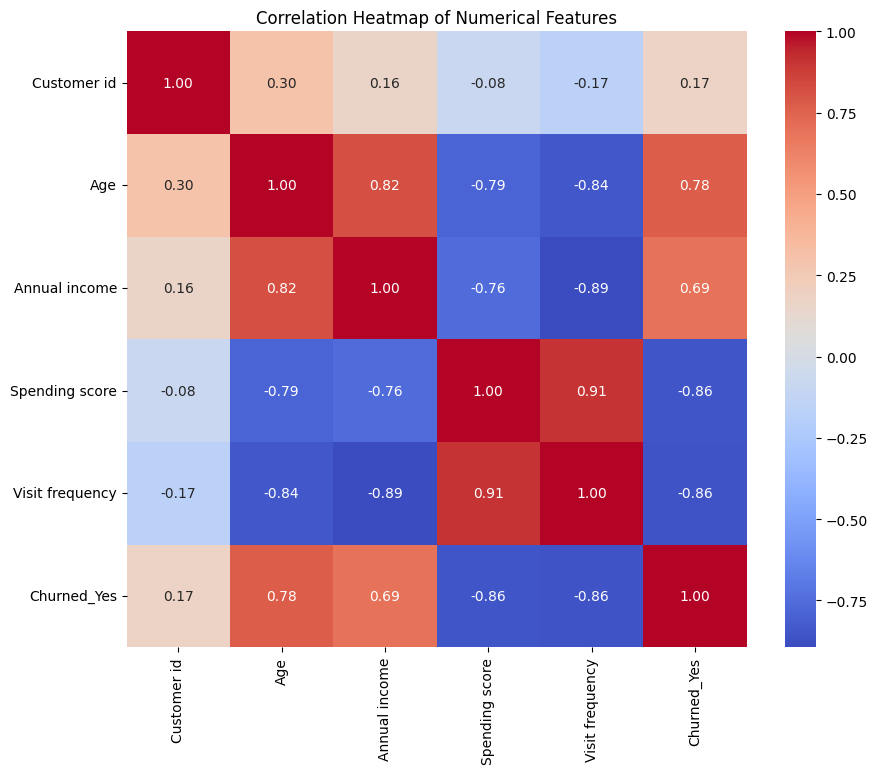

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
features_for_plots = [col for col in numerical_features if col not in ['Customer id', 'Churned_Yes']]
print("Numerical features for plots (excluding 'Customer id' and 'Churned_Yes'):")
print(features_for_plots)

Numerical features for plots (excluding 'Customer id' and 'Churned_Yes'):
['Age', 'Annual income', 'Spending score', 'Visit frequency']


In [ ]:
import numpy as np

numerical_features = df.select_dtypes(include=np.number).columns.tolist()
features_for_plots = [col for col in numerical_features if col not in ['Customer id', 'Churned_Yes']]
print("Numerical features for plots (excluding 'Customer id' and 'Churned_Yes'):")
print(features_for_plots)

Numerical features for plots (excluding 'Customer id' and 'Churned_Yes'):
['Age', 'Annual income', 'Spending score', 'Visit frequency']


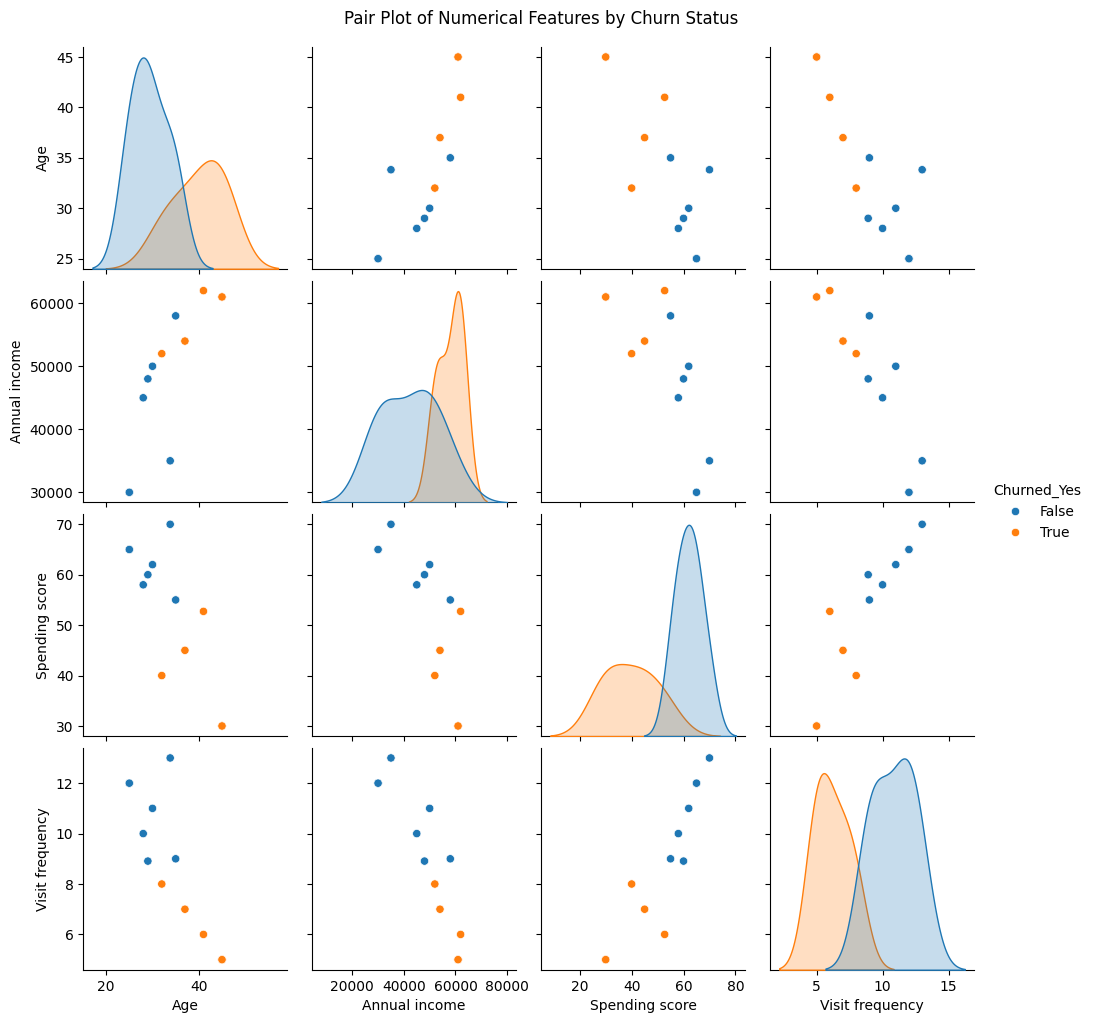

In [ ]:
sns.pairplot(df[features_for_plots + ['Churned_Yes']], hue='Churned_Yes', diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features by Churn Status', y=1.02) # Adjust title position
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Customer id', 'Churned_Yes'])
y = df['Churned_Yes']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (9, 4)
Shape of X_test: (3, 4)
Shape of y_train: (9,)
Shape of y_test: (3,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

logistic_model = LogisticRegression(random_state=42)

logistic_model.fit(X_train, y_train)

y_pred_lr = logistic_model.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")
print(f"Logistic Regression Precision: {precision_lr:.2f}")
print(f"Logistic Regression Recall: {recall_lr:.2f}")
print(f"Logistic Regression F1-Score: {f1_lr:.2f}")

Logistic Regression Accuracy: 1.00
Logistic Regression Precision: 1.00
Logistic Regression Recall: 1.00
Logistic Regression F1-Score: 1.00


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


dtc_model = DecisionTreeClassifier(random_state=42)

dtc_model.fit(X_train, y_train)

y_pred_dtc = dtc_model.predict(X_test)

accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
precision_dtc = precision_score(y_test, y_pred_dtc)
recall_dtc = recall_score(y_test, y_pred_dtc)
f1_dtc = f1_score(y_test, y_pred_dtc)

print(f"\nDecision Tree Accuracy: {accuracy_dtc:.2f}")
print(f"Decision Tree Precision: {precision_dtc:.2f}")
print(f"Decision Tree Recall: {recall_dtc:.2f}")
print(f"Decision Tree F1-Score: {f1_dtc:.2f}")

rf_model = RandomForestClassifier(random_state=42)


rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)


accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)


print(f"\nRandom Forest Accuracy: {accuracy_rf:.2f}")
print(f"Random Forest Precision: {precision_rf:.2f}")
print(f"Random Forest Recall: {recall_rf:.2f}")
print(f"Random Forest F1-Score: {f1_rf:.2f}")


Decision Tree Accuracy: 1.00
Decision Tree Precision: 1.00
Decision Tree Recall: 1.00
Decision Tree F1-Score: 1.00

Random Forest Accuracy: 1.00
Random Forest Precision: 1.00
Random Forest Recall: 1.00
Random Forest F1-Score: 1.00


In [ ]:
import pandas as pd


model_metrics = {
    'Logistic Regression': {
        'Accuracy': accuracy_lr,
        'Precision': precision_lr,
        'Recall': recall_lr,
        'F1-Score': f1_lr
    },
    'Decision Tree': {
        'Accuracy': accuracy_dtc,
        'Precision': precision_dtc,
        'Recall': recall_dtc,
        'F1-Score': f1_dtc
    },
    'Random Forest': {
        'Accuracy': accuracy_rf,
        'Precision': precision_rf,
        'Recall': recall_rf,
        'F1-Score': f1_rf
    }
}

metrics_df = pd.DataFrame.from_dict(model_metrics, orient='index')

print("Model Performance Metrics:")
display(metrics_df)

Model Performance Metrics:


,Accuracy,Precision,Recall,F1-Score
Logistic Regression,1.0,1.0,1.0,1.0
Decision Tree,1.0,1.0,1.0,1.0
Random Forest,1.0,1.0,1.0,1.0


/tmp/ipython-input-3511976966.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index, y='Accuracy', data=metrics_df, palette='viridis')


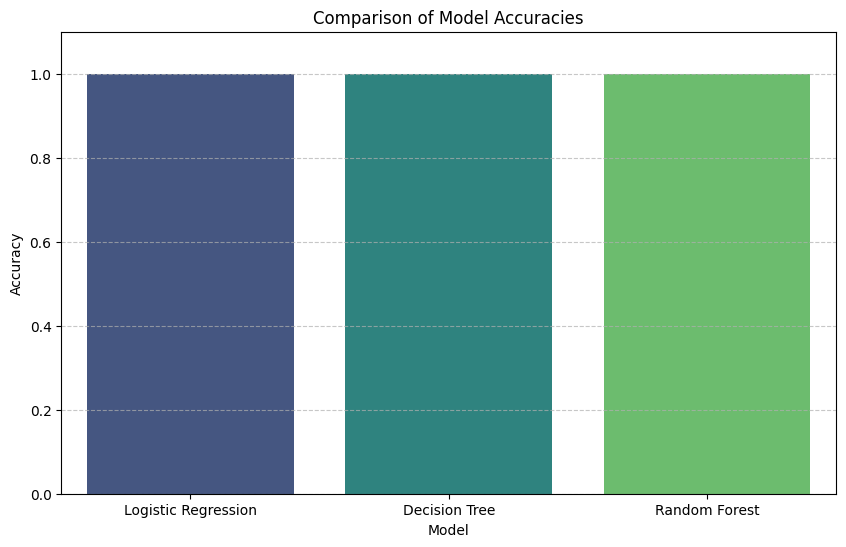

In [ ]:

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics_df.index, y='Accuracy', data=metrics_df, palette='viridis')
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

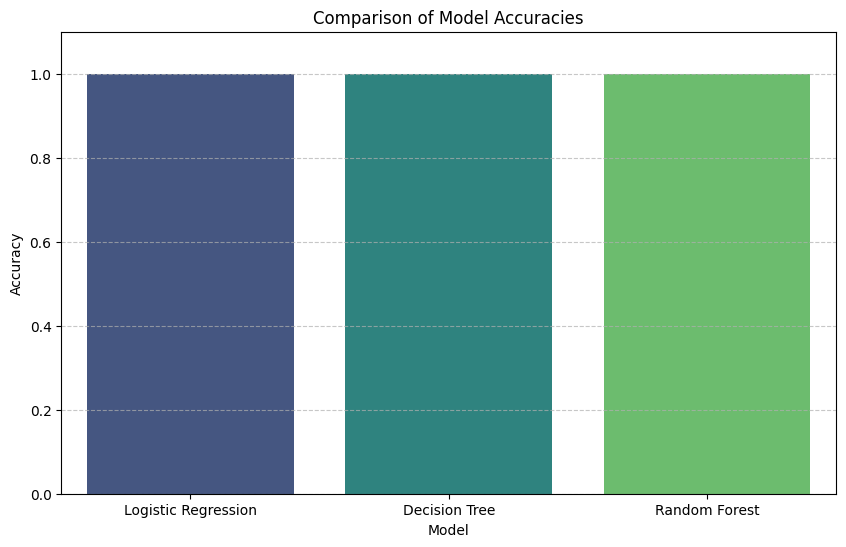

In [ ]:

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics_df.index, y='Accuracy', data=metrics_df, hue=metrics_df.index, palette='viridis', legend=False)
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1) # Set y-axis limit to better visualize accuracy scores
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
best_model_accuracy = metrics_df['Accuracy'].max()
best_models = metrics_df[metrics_df['Accuracy'] == best_model_accuracy]

print("\nSummary of Model Performance:")
print(metrics_df.to_string())

if len(best_models) == 1:
    best_model_name = best_models.index[0]
    print(f"\nBest performing model based on Accuracy: {best_model_name} with an Accuracy of {best_model_accuracy:.2f}")
else:
    print(f"\nMultiple models performed equally best with an Accuracy of {best_model_accuracy:.2f}:")
    for model_name in best_models.index:
        print(f"- {model_name}")


Summary of Model Performance:
                     Accuracy  Precision  Recall  F1-Score
Logistic Regression       1.0        1.0     1.0       1.0
Decision Tree             1.0        1.0     1.0       1.0
Random Forest             1.0        1.0     1.0       1.0

Multiple models performed equally best with an Accuracy of 1.00:
- Logistic Regression
- Decision Tree
- Random Forest
